<a href="https://colab.research.google.com/github/debojit11/ml_nlp_dl_transformers/blob/main/ML_week_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4: Naive Bayes & Decision Trees – Smarter Text Classification

# **SECTION 1: Welcome & Objectives**

In [1]:
print("Welcome to Week 4!")
print("This week, you'll:")
print("- Learn about Naive Bayes — a fast and surprisingly good text classifier")
print("- Understand Decision Trees — a visual, rule-based approach to classification")
print("- Compare them to Logistic Regression using the same spam detection task")

Welcome to Week 4!
This week, you'll:
- Learn about Naive Bayes — a fast and surprisingly good text classifier
- Understand Decision Trees — a visual, rule-based approach to classification
- Compare them to Logistic Regression using the same spam detection task


# **SECTION 2: Why Go Beyond Logistic Regression?**

### Why Look at New Models?
Logistic Regression works well — but only when:
- Classes are **linearly separable**
- Features are **not too correlated**
- You don’t have too many irrelevant features

But NLP data (like text) often breaks these rules. So we need alternatives:
- **Naive Bayes**: Handles high-dimensional text well
- **Decision Trees**: Captures non-linear relationships

# **SECTION 3: Dataset Setup (Same SMS Spam Dataset)**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Load and prepare dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', names=["label", "message"])
data['label_num'] = data['label'].map({'ham': 0, 'spam': 1})

In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['message'])
y = data['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 Naive Bayes & Decision Trees – Theory & Math (Made Simple)

---

### 📦 Why move beyond Logistic Regression?

Logistic Regression works well when:
- Features are nicely spread out
- Data is linearly separable
- Text data is clean and low-dimensional

But in **real-world NLP**, we often deal with:
- Tons of **irrelevant words**
- **Correlated features** (like "win" and "prize")
- **Non-linear decision boundaries**

So, we need other models:
➡️ Let’s explore **Naive Bayes** and **Decision Trees**.

---

## 🐦 Naive Bayes – Fast and Surprisingly Powerful

### 🌟 Core idea:
Use **Bayes’ Theorem** to find the most probable class **given the words** in a message.

$$
P(\text{Spam} \mid \text{Words}) = \frac{P(\text{Words} \mid \text{Spam}) \cdot P(\text{Spam})}{P(\text{Words})}
$$

We ignore $P(\text{Words})$ since it’s the same for all classes.  
We care about this:

$$
\text{Score}(\text{Spam}) \propto P(\text{Spam}) \cdot \prod_{i} P(w_i \mid \text{Spam})
$$

### 🙈 Why “Naive”?

It assumes all words are **independent**, given the class.  
So “win” and “free” are treated like they appear separately — even if they often occur together in spam.

This assumption is unrealistic (hence naive), but it **works surprisingly well** in practice — especially for text classification.

---

### ⚙️ How does it learn?

From your training data, it estimates:
- $P(\text{Spam})$ = how often spam messages appear
- $P(w_i \mid \text{Spam})$ = how often each word appears in spam

Then it scores a new message by multiplying those probabilities.

---

# **SECTION 4: Naive Bayes Classifier**

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [6]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [7]:
print("--- Naive Bayes ---")
print(classification_report(y_test, y_pred_nb))

--- Naive Bayes ---
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115




### 🟢 Pros
- Very fast and easy to implement
- Works well with lots of text features
- Doesn’t overfit much

### 🔴 Cons
- Assumes word independence (not true in real life)
- Can struggle with rare words

---

# **SECTION 5: Decision Tree Classifier**


## 🌳 Decision Trees – If/Else Rules for Classification

### 🌟 Core idea:
Break the data into branches by asking yes/no questions about features — like:

<pre>
Is the word “free” in the message?
├── Yes → Spam
└── No → Is the word “hello” in the message
         ├── Yes → Ham
         └── No → Spam
</pre>

Each node checks one condition, and the model follows the path down.

---

### 📐 How does it decide which questions to ask?

It picks the **best feature** to split on using a metric like:

- **Gini Impurity**
- **Entropy (Information Gain)**

### Example: Gini Impurity

$$
G = 1 - \sum p_i^2
$$

Where $p_i$ is the probability of each class in a split.  
The goal: **make each branch as pure as possible** (i.e., mostly one class).

---

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [10]:
print("--- Decision Tree ---")
print(classification_report(y_test, y_pred_dt))

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.94      0.86      0.90       149

    accuracy                           0.97      1115
   macro avg       0.96      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



### 🟢 Pros
- Easy to interpret (like a flowchart)
- Can capture **non-linear** relationships
- Works without scaling features

### 🔴 Cons
- Can **overfit** easily
- Not great with small data unless pruned

---

## 🧠 TL;DR Summary

| Model            | Best For                          | Weaknesses                      |
|------------------|-----------------------------------|----------------------------------|
| Naive Bayes      | Text classification, spam filters | Assumes word independence        |
| Decision Trees   | Rule-based logic, explainability  | Can overfit, less robust to noise|

---

You now have two new tools in your NLP toolbox.  
Next week, we’ll boost their power using **Random Forests**! 🌲🌲🌲

### Model Comparison:
| Model            | Good For                                 | Limitations                         |
|------------------|--------------------------------------------|-------------------------------------|
| Logistic Reg.    | Fast, linear separation                    | Can’t capture non-linear patterns   |
| Naive Bayes      | Text data, high dimensions                 | Assumes feature independence        |
| Decision Tree    | Visual rules, non-linear decision making   | Can overfit if not pruned           |

➡️ No one model is best for all tasks. Try many and compare!

# **SECTION 7: What's Next?**

### What’s Coming in Week 5?
You’ve used some core classifiers. But what if we want even **better accuracy**?
Or combine multiple models to make a decision?

➡️ Week 5 = **Random Forests** + **Model Evaluation the Right Way** 🚀

# **SECTION 8: Exercises**

### Exercises:
1. Tune `max_depth` of the Decision Tree and observe results
2. Try `CountVectorizer` with Naive Bayes and compare
3. Visualize the decision tree using `sklearn.tree.plot_tree`

You’ve now explored **two powerful new classifiers** for NLP tasks! 💡

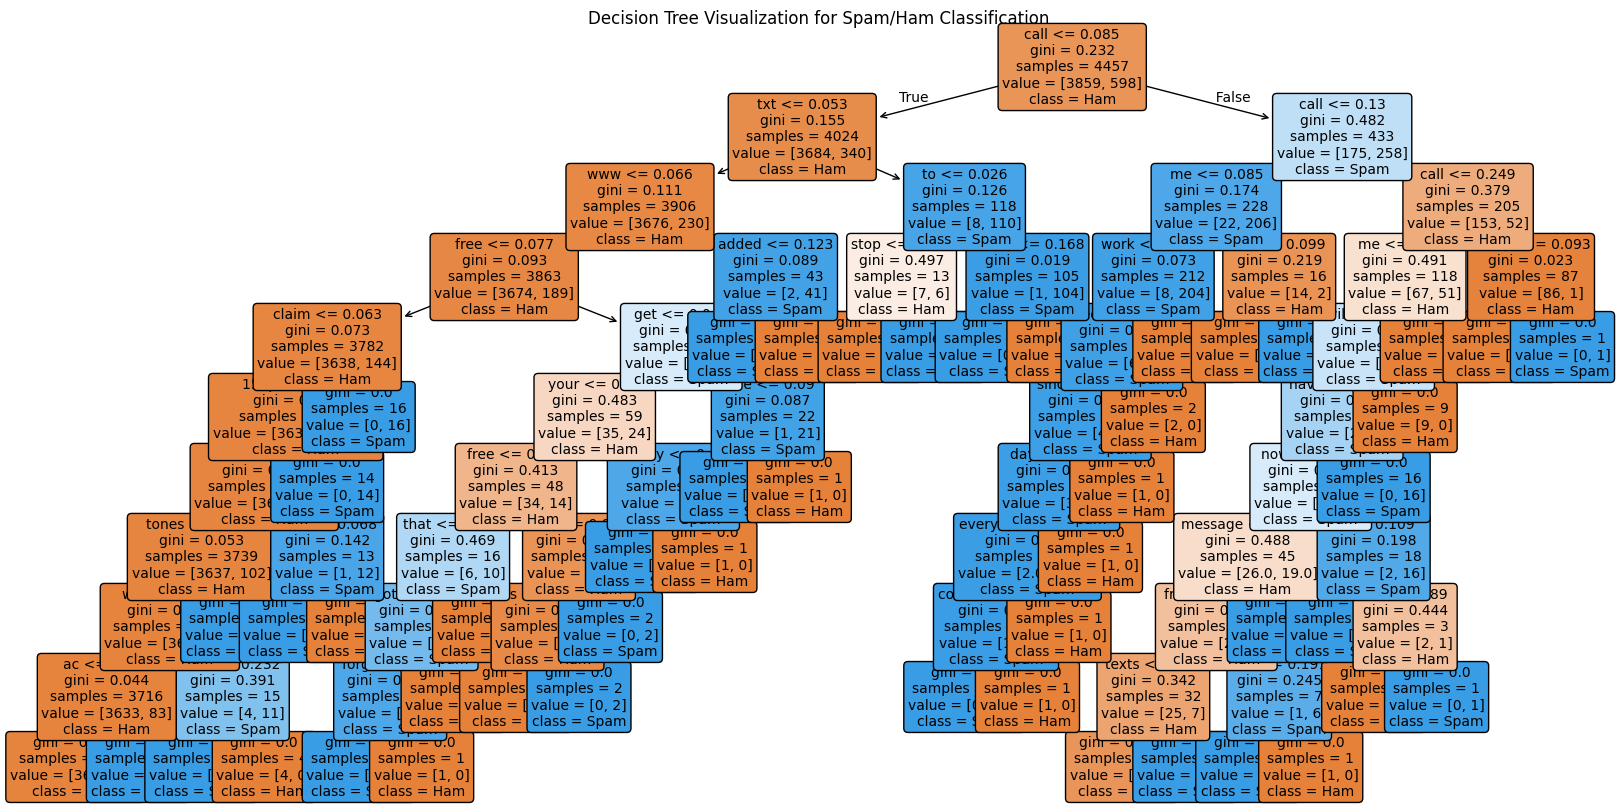

In [14]:
# 3
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(dt,
          filled=True,
          feature_names=vectorizer.get_feature_names_out().tolist(), # Get feature names from vectorizer
          class_names=['Ham', 'Spam'], # Assuming 0 is Ham and 1 is Spam
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization for Spam/Ham Classification")
plt.show()